# Introduction to Simpson's Rule

This code calculates the definite integral of a function using numerical methods. It approximates the area under a curve using a user-supplied number of boxes. However, the top of each box is a parabola - enabling each box to more-closely approximate the curvature of the original function.

## Simpson's Rule Divides the domain into increments:

The domain is divided into equal-width increments using the following expressions:

$$x_i = a + i \times \Delta x$$

$$\Delta x = \frac{b-a}{n}$$

Keep in mind that this formulation only works for even values of "n."

## Simpson's Rule Performs the integration:

The following expression performs the numerical integration. Note the pattern followed by the coefficients (1, 4, 2, 4, 2, ..., 2, 4, 1).

$$S_n = \frac{\Delta x}{3} \left[ f\left(x_0\right) + 4f\left(x_1\right) +2f\left(x_2\right) +4f\left(x_3\right) + ... + 2f\left(x_{n-2}\right) + 4f\left(x_{n-1}\right) + f\left(x_n\right) \right]$$

## Error Bound for Simpson's Rule
Suppose that $\left\lvert f^{\left(4 \right)}\left(x \right) \right\rvert \leq K$ for $a \leq x \leq b$. If $E_S$ is the error involved in using Simpson's Rule, then

$$ \left\lvert E_S \right\rvert \leq \frac{K \left( b - a \right)^5}{180 n^4} $$

Don't worry, the only thing this code needs you to do is enter the fourth derivative of your function.

# Part 1: Problem Setup

## Import Python Packages

Typically, it is best practice to import the various packages you'll be using at the top of your code.

In [1]:
import math
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Parameters
(the problem-specific information)

### The Function

We'll make use of the "eval" command to allow the user to enter the equation as a string, which Python can then evaluate as a mathematical expression.

- *Keep in mind that the function must be entered using proper Python math syntax.*
- you must use "xi" as the variable to represent "x," the independent variable in your function.

For example, if you're trying to integrate the function 
$$f\left( x\right) = x^2 - 3x + 7$$

You should enter "xi ** 2 - 3 * xi + 7"

#### Enter the function in the cell below, inside the quotes:

In [2]:
func = "(math.cos(xi)) ** 2"

### The Limits of Integration

*The variables are named according to:*

$$ \int_a^b f \left(x \right) \,dx $$

#### Enter the limits of integration below:

In [3]:
# Lower Limit
a = 0
# Upper Limit
b = 2*math.pi

### Here's an xkcd-style plot of your function!

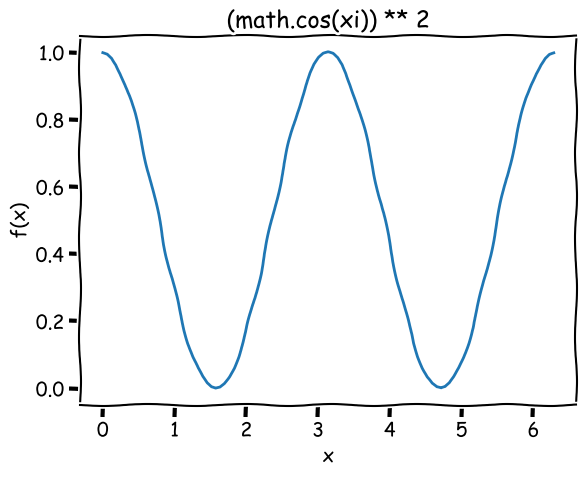

In [4]:
with plt.xkcd():
    fig1 = plt.figure()
    plt.plot(np.linspace(a, b, 101), [eval(func) for xi in np.linspace(a, b, 101)])
    plt.title(func)
    plt.xlabel("x")
    plt.ylabel("f(x)")

#### Here's a test value of your function:

(select a value for xi that is in the domain of your function)

In [5]:
xi = 0.6283185307179586
test_value = eval(func)
print(test_value)

0.6545084971874737


### Number of Increments

Numerical integration relies on dividing the domain into increments. Typically, the more increments the greater the accuracy of the result. However, adding increments increases the computational cost of the method - we must balance speed and accuracy to achieve the result we're looking for.

#### Enter the number of increments below:

In [6]:
# Number of Increments
n = 22

### The Fourth Derivative

Estimating the error of the numerical integration requires the fourth derivative of the function. We'll make use of the "eval" command to allow the user to enter the equation as a string, which Python can then evaluate as a mathematical expression.

- *Keep in mind that the function must be entered using proper Python math syntax.*
- you must use "xi" as the variable to represent "x," the independent variable in your function.
- if you don't want an error estimate, enter "0"
- if the fourth derivative is zero, enter "xi * 0".

In [7]:
f4 = "8 * math.cos(2*xi)"

## Problem Summary:

In [8]:
print(f"Let's take the integral of {func} from {a} to {b} using {n} increments!")

Let's take the integral of (math.cos(xi)) ** 2 from 0 to 6.283185307179586 using 22 increments!


# Part 2: Compute Integral

## Initialization
The first part of calculating a solution is populating the various variables we'll need. This involves some calculations, and also creating empty lists of proper size to hold the invidual values.

 - 'deltaX' is a single-valued float that we need to calculate
 - 'x' is a list of all $x$ values we'll evaluate the function at, determined using $a + i \Delta x$
 - 'ci' is the coefficient list - Simpson's Rule uses coefficients to weight the value of each point at which the function is evaluated following the pattern: $\left(1, 4, 2, 4, ... 2, 4, 1 \right)$
 - 'fx' is a list of $0$'s which will hold the function output at each value of $x$

### Calculate $\Delta x$

In [9]:
deltaX = (b-a)/n
print(f"deltaX is {deltaX}")

deltaX is 0.28559933214452665


### Initialize $x$ using 'range' and 'list comprehensions'

 - First, we'll use "range" to create a list of integers from $0$ to $n+1$. These are the $i$ values.
 - Then we multiply the $i$ values by $\Delta x$.
     - We can do this in a single line using a 'List Comprehension'
     - It is like a 'for' loop in a single line:
         - [deltaX * item for item in range(n+1)] takes each item in the 'range' and multiplies it by 'deltaX'
     - Now we have a list filled with $i \times \Delta x$.
 - Lastly, we add $a$ to each item, because we want to start at the lower limit of integration
     - Now we have a list filled with each value of $a + i \times \Delta x$.

In [10]:
x = [a + deltaX * item for item in range(n+1)]
print("The function will be evaluated at x= ")
print(*x, sep = "\n")

The function will be evaluated at x= 
0.0
0.28559933214452665
0.5711986642890533
0.8567979964335799
1.1423973285781066
1.4279966607226333
1.7135959928671598
1.9991953250116865
2.284794657156213
2.5703939893007397
2.8559933214452666
3.141592653589793
3.4271919857343196
3.7127913178788465
3.998390650023373
4.2839899821679
4.569589314312426
4.855188646456953
5.140787978601479
5.426387310746007
5.711986642890533
5.99758597503506
6.283185307179586


### Initialize the Coefficient List using 'Slicing'
This numerical integration method uses coefficients to give weight to the values. Ultimately this is part of what makes the method use parabolas instead of straight lines to approximate the top of each box.

$$c_i = \left(1,4,2,4,2,...,2,4,1\right)$$

Build the list by combining 3 lists:
- [1] + [middle] + [4,1]
- [1] is the first element
- [middle] can be built using list multiplication:
    - [4,2] * 3 = [4,2,4,2,4,2]
    - We need the number of elements in the middle of the list
    - Remember the true number of elements in the list is n + 1.
        - If n = 12, there are 13 elements
    - round((n-2)/2) takes the number of elements in the middle of the list and divides by 2. This is how many [4,2] pairs we need.
        - If n = 12, (n-2)/2 = (12 - 2)/2 = 5.
        - Round is there to cast the output of division as an integer.
    - [middle] = [4,2] * round((n-2)/2)
- [4, 1] at the end adds the last 2 elements



In [11]:
ci = [1] + [4,2] * round((n-2)/2) + [4,1]
print("ci looks like:")
print(*ci, sep = "\n")

ci looks like:
1
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
1


## Integration
Now that the variables are initialized, we can evaluate the integral!

### Evaluate $f\left( x_i \right)$ using 'List Comprehension'
The first step of evaluating the integral is to evaluate the function at each value of $x$.

In [12]:
fx = [eval(func) for xi in x]
print("fx looks like:")
print(*fx, sep = "\n")

fx looks like:
1.0
0.9206267664155905
0.7077075065009433
0.42884258086335764
0.17256963302735748
0.0202535131927513
0.020253513192751267
0.1725696330273574
0.42884258086335736
0.707707506500943
0.9206267664155905
1.0
0.9206267664155907
0.7077075065009433
0.42884258086335764
0.1725696330273574
0.020253513192751336
0.020253513192751225
0.17256963302735714
0.42884258086335764
0.7077075065009433
0.9206267664155905
1.0


#### Here's a plot of your function showing the intervals:

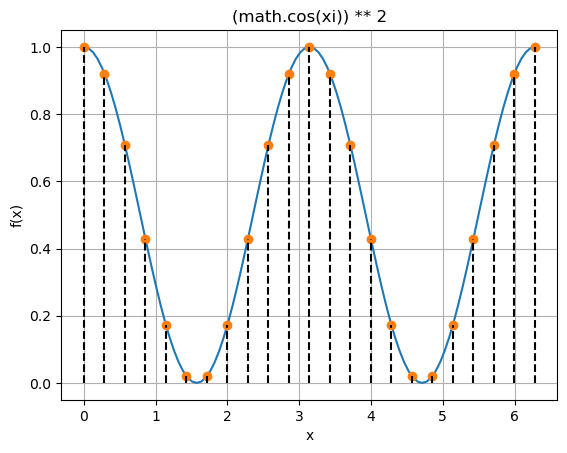

In [22]:
fig2 = plt.figure()
plt.plot(np.linspace(a, b, 101), [eval(func) for xi in np.linspace(a, b, 101)])
plt.plot(x,fx,'o')
plt.title(func)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

for i in range(n+1):
    plt.plot([x[i], x[i]], [0, fx[i]],'--k')

### Multiply by the coefficients for Simpson's Rule using 'List Comprehension'
Next, we multiply each of the values of $f\left( x \right)$ by the appropriate coefficient from Simpson's Rule

In [14]:
Si = [ci[i] * fx[i] for i in range(len(fx))]
print("Si looks like:")
print(*Si, sep = "\n")

Si looks like:
1.0
3.682507065662362
1.4154150130018865
1.7153703234534305
0.34513926605471495
0.0810140527710052
0.040507026385502534
0.6902785321094296
0.8576851617267147
2.830830026003772
1.841253532831181
4.0
1.8412535328311814
2.830830026003773
0.8576851617267153
0.6902785321094296
0.04050702638550267
0.0810140527710049
0.3451392660547143
1.7153703234534305
1.4154150130018865
3.682507065662362
1.0


### Add up the individual values and multiply by $\frac{\Delta x}{3}$ using the 'sum' function

$$S_n = \frac{\Delta x}{3} \left[ f\left(x_0\right) + 4f\left(x_1\right) +2f\left(x_2\right) +4f\left(x_3\right) + ... + 2f\left(x_{n-2}\right) + 4f\left(x_{n-1}\right) + f\left(x_n\right) \right]$$

In [15]:
S = sum(Si)*(deltaX/3)
print(f"The integral of {func} from {a} to {b} is {S}")

The integral of (math.cos(xi)) ** 2 from 0 to 6.283185307179586 is 3.1415926535897922


## Error Estimate
Now that we've evaluated the integral, we can estimate the accuracy of our estimate.

### Evaluate $f^{\left( 4 \right)}\left( x_i \right)$ using 'List Comprehension'
The first step of estimating the error is to evaluate the fourth derivative at each value of $x$.

In [16]:
print(f"Let's evaluate {f4} at each value of x.")
f4x = [eval(f4) for xi in x]
print("f4x looks like:")
print(*f4x, sep = "\n")

Let's evaluate 8 * math.cos(2*xi) at each value of x.
f4x looks like:
8.0
6.73002826264945
3.3233201040150915
-1.13851870618628
-5.23888587156228
-7.675943788915979
-7.67594378891598
-5.238885871562282
-1.138518706186282
3.3233201040150884
6.73002826264945
8.0
6.730028262649451
3.323320104015092
-1.138518706186278
-5.238885871562282
-7.675943788915979
-7.675943788915981
-5.238885871562286
-1.1385187061862767
3.323320104015093
6.730028262649449
8.0


### Find $K$ the maximum absolute value of $f^{\left( 4 \right)}\left( x_i \right)$

We need  $\left\lvert f^{\left(4 \right)}\left(x \right) \right\rvert \leq K$ for $a \leq x \leq b$

- List comprehension applies abs() to all items in f4x
- Max returns the largest value
- The largest value is 'K' in the error estimate formula

In [17]:
K = max([abs(item) for item in f4x] )
print(f"K is {K}")

K is 8.0


### Estimate Error using the formula

$$ \left\lvert E_S \right\rvert \leq \frac{K \left( b - a \right)^5}{180 n^4} $$

In [18]:
ES = ( K * ( (b - a) ** 5 ) ) / (180 * (n ** 4) )
print(f"The integral is {S} with an error of {ES}")
print(f"The true value of the integral is in [{S-ES}, {S+ES}]")

The integral is 3.1415926535897922 with an error of 0.0018579161094659984
The true value of the integral is in [3.1397347374803264, 3.143450569699258]
